In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: >

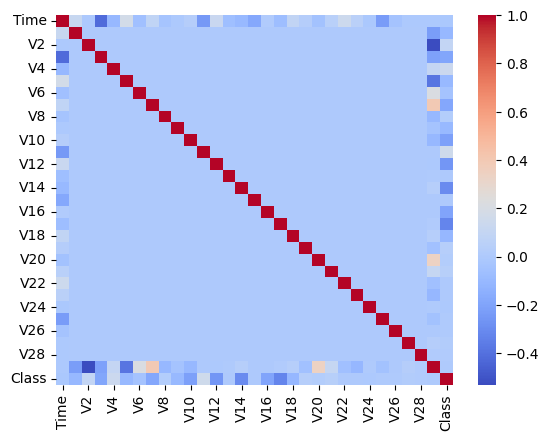

In [7]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [8]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
normal=df[df.Class==0]
fraud=df[df.Class==1]
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [10]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [11]:
normal_sample=normal.sample(n=492)
new_file=pd.concat([normal_sample,fraud],axis=0)


In [12]:
new_file.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
30592,35995.0,1.053277,-0.013309,0.282071,1.262380,-0.328526,-0.410608,0.059797,-0.006033,0.168624,...,0.125981,0.224935,-0.126335,0.059048,0.531656,-0.254596,0.012960,0.028270,75.00,0
2806,2364.0,-1.303390,1.451622,0.210419,-0.365147,-0.314256,-0.081985,-0.287094,1.138562,-0.394935,...,-0.225017,-0.919637,-0.043687,-0.919111,-0.044095,0.142735,0.111400,0.016982,9.98,0
20625,31164.0,1.534286,-0.938978,-0.739794,-1.907128,-0.060218,0.496395,-0.611913,-0.030816,-2.438023,...,-0.517226,-1.165657,-0.073631,-1.739188,0.482271,-0.335406,0.013288,-0.009657,39.17,0
111760,72358.0,-0.866577,1.577138,1.282551,2.052141,0.711365,1.136185,0.415644,0.269762,-0.766652,...,-0.328554,-0.452877,-0.251244,-1.037498,-0.207613,-0.091044,-0.070544,-0.273051,0.76,0
279506,168914.0,0.036777,0.825349,0.284599,-0.588419,0.401272,-1.056775,0.956856,-0.153195,0.028991,...,-0.261221,-0.587733,0.078210,-0.033288,-0.521544,0.145114,0.247741,0.095709,1.29,0
13413,23716.0,-1.448540,0.405678,1.549291,1.105241,0.340938,1.706729,-0.628488,0.975082,0.978373,...,0.082851,0.306889,-0.299333,-1.748058,0.503517,0.031619,0.216965,-0.021262,86.60,0
252620,155892.0,2.057085,0.156833,-1.794370,1.270376,0.614585,-0.727465,0.492128,-0.247948,0.379839,...,0.021499,0.210099,0.048344,0.643730,0.445994,-0.515127,-0.026282,-0.059545,0.89,0
118117,74957.0,-0.884674,0.789085,-0.262496,-2.411150,1.991090,3.151908,-0.294951,1.378149,-0.314944,...,-0.092633,-0.505287,-0.045253,1.035191,-0.158850,0.736594,0.133867,0.105948,7.68,0
237771,149383.0,1.994414,0.198878,-1.527961,1.290176,0.440207,-0.878733,0.525185,-0.269349,-0.045045,...,0.101238,0.496705,0.004255,0.019889,0.415529,-0.510959,-0.017694,-0.072919,1.00,0
232286,147113.0,1.629657,-1.005061,-0.830974,0.304987,-0.524145,-0.240532,-0.183037,-0.216720,0.846120,...,0.284028,0.538055,-0.119103,-0.605083,-0.276797,0.666670,-0.068150,-0.013146,232.60,0


In [13]:
new_file['Class'].value_counts()


Class
0    492
1    492
Name: count, dtype: int64

In [14]:
new_file.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96173.363821,-0.115545,-0.094846,-0.034031,-0.072742,0.082600,-0.079386,-0.033367,0.031571,-0.003249,...,0.016619,-0.007610,0.016914,0.011158,0.026588,0.031003,0.029238,-0.005209,0.006616,88.689207
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [15]:
X=new_file.drop(columns='Class',axis=1)
Y=new_file['Class']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
model=LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [17]:
X_train_prediction=model.predict(X_train)
training_data_acuracy=accuracy_score(X_train_prediction,Y_train)*100
print(f"Accuracy of Model: {training_data_acuracy}%")

Accuracy of Model: 94.79034307496823%
